# 로지스틱 회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt

* 이진 분류기

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [3]:
X = iris["data"][:, 3:]  # 꽃잎 넓이
y = (iris["target"] == 2).astype(np.int)  # Iris-Virginica이면 1 아니면 0

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

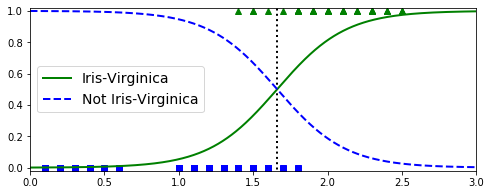

In [16]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] #확률이 50%가 넘기 시작한 제일 처음 샘플
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [17]:
y_proba[:100]

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       [9.99220183e-01, 7.79816732e-04],
       [9.99209978e-01, 7.90022153e-04],
       [9.99199639e-01, 8.00361024e-04],
       [9.99189165e-01, 8.10835088e-04],
       [9.99178554e-01, 8.21446109e-04],
       [9.99167804e-01, 8.32195877e-04],
       [9.99156914e-01, 8.43086202e-04],
       [9.99145881e-01, 8.54118919e-04],
       [9.99134704e-01, 8.65295886e-04],
       [9.99123381e-01, 8.76618985e-04],
       [9.99111910e-01, 8.88090125e-04],
       [9.99100289e-01, 8.99711238e-04],
       [9.99088516e-01, 9.11484280e-04],
       [9.99076589e-01, 9.23411234e-04],
       [9.99064506e-01, 9.35494108e-04],
       [9.99052265e-01, 9.47734937e-04],
       [9.99039864e-01, 9.60135782e-04],
       [9.99027301e-01, 9.72698731e-04],
       [9.99014574e-01, 9.85425898e-04],
       [9.99001681e-01, 9.98319426e-04],
       [9.98988619e-01, 1.01138149e-03],
       [9.989753

In [18]:
decision_boundary

array([1.66066066])

In [19]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

# 소프트맥스 회귀

In [20]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
softmax_reg.predict([[5, 2]])

array([2])

In [22]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])